# Problem 1

## (a) 
Show the distribution of mean values of N random variables obtained from a uniform distribution for increasing numbers of N (i.e., N = 2, 5, 20, 200) and compare each distribution with a Gaussian with the same mean and variance as the obtained distribution.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import mlab
import math

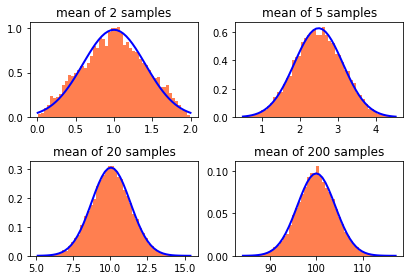

In [41]:
def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

# Number of samples for each trial
samples = [2, 5, 20, 200]
numBins = 50
trials = 10**4

for i, N in enumerate(samples):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    means = []
    for i in range(trials):
        dist = np.random.uniform(0,1,N)
        means.append(sum(dist))
    mean = np.mean(means)
    variance = np.var(means)
    count, bins, ignored = plt.hist(means, numBins, normed = True, color = "coral")
    plt.plot(bins, mlab.normpdf(bins, mean, np.sqrt(variance)), color = "blue", linewidth = 2)
    plt.title("mean of " +str(N) + " samples")

## (b)
Do the same as (a) but using the distribution in problem 4 of problem set 1, with a = 2.

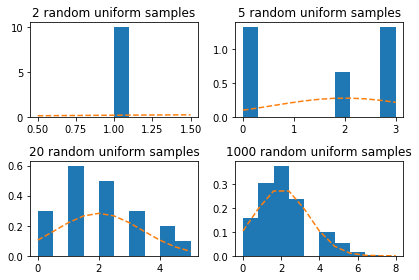

In [10]:
# Number of samples for each trial
samples = [2, 5, 20, 1000]
numBins = 10

# Poisson Parameters
a = 2

for i, n in enumerate(samples):
    plt.subplot(2,2,i+1)
    plt.tight_layout()
    s = np.random.poisson(a, n)
    count, bins, ignored = plt.hist(s, numBins, normed = True)
    y = mlab.normpdf(bins, a, math.sqrt(a))
    plt.plot(bins, y, '--')
    plt.title(str(n) + " random uniform samples")

# Problem 2

Text(0.5,1,'10^5 samples from [Fe/H] parent pdf')

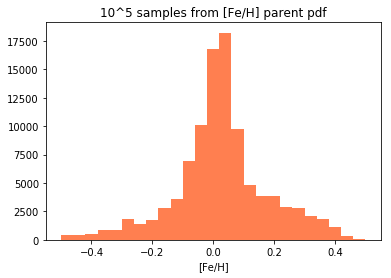

In [26]:
# Probabilities for sampling
# These are the number of samples observered as given by the data set for each interval
probabilities = [10, 11, 12, 18, 19, 40, 30, 36, 58, 77, 149, 216, 361, 386, 208, 103, 84, 84, 61, 57, 43, 39, 24, 7, 1, 1]

# Normalize the probabilities
s = float(sum(probabilities))
probabilities[:] = [x / s for x in probabilities]

# Get 10^5 samples
numSamples = 10**5
sampleRange = np.arange(-0.5, 0.54, 0.04) # [-0.5, 0.5]
distribution = np.random.choice(sampleRange, numSamples, p = probabilities)

plt.hist(distribution, 25, color="coral")
plt.xlabel('[Fe/H]')
plt.title('10^5 samples from [Fe/H] parent pdf')

# Problem 3

## (d)
Use python to plot the data and the regression line you found in 1c.

In [2]:
# Samples
x = [1,3,5]
y = [8,2,1]

avg_x = np.average(x)
avg_y = np.average(y)

cov = 0
for i in range(3):
    cov += (x[i] - avg_x)*(y[i]-avg_y)/3

a = cov/np.var(x)
b = avg_y - a*avg_x

Text(0,0.5,'Y')

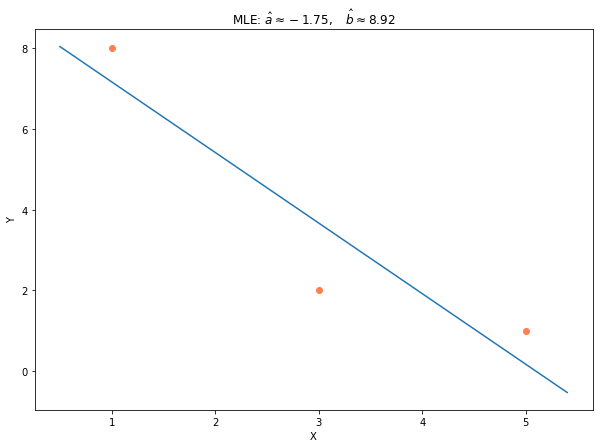

In [5]:
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
plt.figure(figsize=(10,7))
plt.scatter(x, y, marker='o', color="coral")
t = np.arange(0.5, 5.5, 0.1)
plt.plot(t, a*t+b)
plt.title(r'MLE: $\hat{a} \approx -1.75,\quad \hat{b} \approx 8.92$')
plt.xlabel('X')
plt.ylabel('Y')